In [1]:
import folium
from folium.plugins import HeatMap
import pandas as pd

# Load the earthquake data
data_path = 'responses.csv'
earthquake_data = pd.read_csv(data_path)

# Calculate the IQR for latitude and longitude
Q1_lat, Q3_lat = earthquake_data['Latitude'].quantile([0.25, 0.75])
IQR_lat = Q3_lat - Q1_lat

Q1_lon, Q3_lon = earthquake_data['Longitude'].quantile([0.25, 0.75])
IQR_lon = Q3_lon - Q1_lon

# Define margins for outliers
margin = 50
# Adjust this based on how aggressively you want to remove outliers

# Filter out outliers based on IQR
filtered_data = earthquake_data[
    (earthquake_data['Latitude'] >= (Q1_lat - margin * IQR_lat)) & 
    (earthquake_data['Latitude'] <= (Q3_lat + margin * IQR_lat)) &
    (earthquake_data['Longitude'] >= (Q1_lon - margin * IQR_lon)) & 
    (earthquake_data['Longitude'] <= (Q3_lon + margin * IQR_lon))
]

# Continue with the heatmap creation using `filtered_data`



# Basic data cleaning, if necessary
# Ensure there are no missing values in the 'Latitude' and 'Longitude' columns
earthquake_data.dropna(subset=['Latitude', 'Longitude'], inplace=True)

# Create a map object centered around the mean latitude and longitude of the data
m = folium.Map(location=[earthquake_data['Latitude'].mean(), earthquake_data['Longitude'].mean()], zoom_start=5)

# Create a list of coordinates for the heatmap
heat_data = [[row['Latitude'], row['Longitude']] for index, row in earthquake_data.iterrows()]

# Add the heat map layer to the map
HeatMap(heat_data).add_to(m)

# Display the map
m


In [16]:
import pandas as pd

# Load the CSV file
data_path = 'intensityDistance.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataframe to understand its structure
print(df.head())

   Actual Distance (km)  Intensity  Estimated Distance (km)  Intensity.1
0                 264.5        2.7                     9.70     3.405564
1                  28.7        3.4                    10.67     3.368930
2                 114.4        2.0                    11.74     3.326898
3                  56.2        2.0                    12.91     3.279463
4                 112.6        2.1                    14.20     3.225928


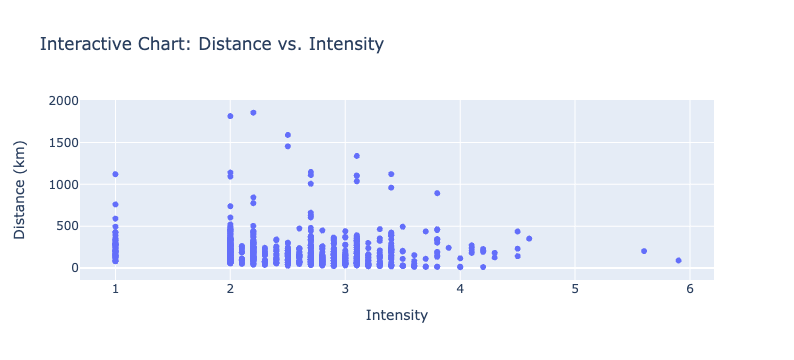

In [23]:
import pandas as pd
import plotly.express as px

# Load the data from the updated CSV file
data_path = 'intensityDistance.csv'
df = pd.read_csv(data_path)

# Setting initial values for customizable portions
x_axis_column = 'Intensity'  # Assuming you want to use the first "Intensity" column for x-axis
y_axis_column = 'Actual Distance (km)'  # Using "Actual Distance (km)" for y-axis
# Optional: You might want to compare with "Estimated Distance (km)" in the same or a different plot.

title_text = 'Interactive Chart: Distance vs. Intensity'  # Customize the chart title as needed
x_axis_label = 'Intensity'  # Custom x-axis label
y_axis_label = 'Distance (km)'  # Custom y-axis label

# Creating an interactive scatter plot
fig = px.scatter(df, 
                 x=x_axis_column, 
                 y=y_axis_column, 
                 title=title_text,
                 labels={
                     x_axis_column: x_axis_label, 
                     y_axis_column: y_axis_label
                 },
                 hover_data=df.columns.tolist())  # Using all columns for hover data for comprehensive insights

# Display the interactive plot
fig.show()


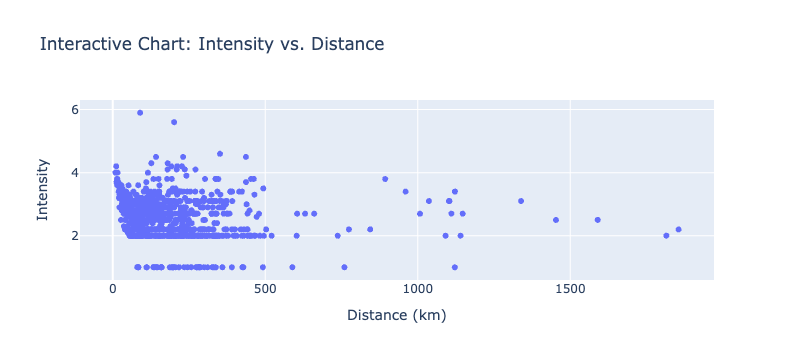

In [24]:
import pandas as pd
import plotly.express as px

# Load the data from the updated CSV file
data_path = 'intensityDistance.csv'
df = pd.read_csv(data_path)

# Setting initial values for customizable portions with reversed axes
x_axis_column = 'Actual Distance (km)'  # Using "Actual Distance (km)" for x-axis
y_axis_column = 'Intensity'  # Assuming you want to use the first "Intensity" column for y-axis

title_text = 'Interactive Chart: Intensity vs. Distance'  # Customize the chart title as needed
x_axis_label = 'Distance (km)'  # Custom x-axis label
y_axis_label = 'Intensity'  # Custom y-axis label

# Creating an interactive scatter plot with reversed axes
fig = px.scatter(df, 
                 x=x_axis_column, 
                 y=y_axis_column, 
                 title=title_text,
                 labels={
                     x_axis_column: x_axis_label, 
                     y_axis_column: y_axis_label
                 },
                 hover_data=df.columns.tolist())  # Using all columns for hover data for comprehensive insights

# Display the interactive plot
fig.show()


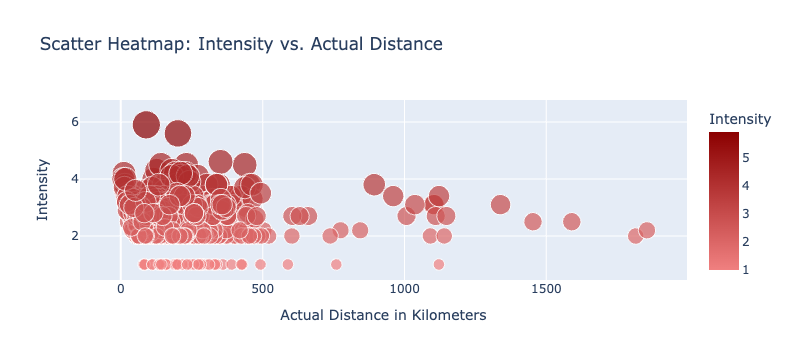

In [25]:
import pandas as pd
import plotly.express as px

# Load the data from the updated CSV file
data_path = 'intensityDistance.csv'
df = pd.read_csv(data_path)

# Assuming 'Intensity' and 'Actual Distance (km)' are your columns of interest
# Mapping both color and size to 'Intensity' to reflect higher intensity in both size and color

# Defining a continuous color scale from light red to dark red
color_scale = [[0, 'lightcoral'], [1, 'darkred']]

# Creating the scatter plot
fig = px.scatter(df, 
                 x='Actual Distance (km)', 
                 y='Intensity', 
                 color='Intensity',  # Color mapped to Intensity
                 size='Intensity',  # Size mapped to Intensity
                 color_continuous_scale=color_scale,  # Using the red color scale
                 title='Scatter Heatmap: Intensity vs. Actual Distance',
                 labels={'Actual Distance (km)': 'Actual Distance in Kilometers', 
                         'Intensity': 'Intensity'})

# Updating layout for clarity
fig.update_layout(coloraxis_colorbar=dict(title='Intensity'))

# Display the interactive plot
fig.show()
